In [15]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
x_values = np.linspace(0,10,10) + np.random.uniform(-1.5, 1.5, 10)
y_values = np.sqrt(x_values)

In [17]:
x_values

array([ 1.415568  ,  1.12127626,  2.20701529,  2.23156029,  5.13164195,
        6.18890701,  5.84055308,  7.60513306,  7.84382349, 11.32643205])

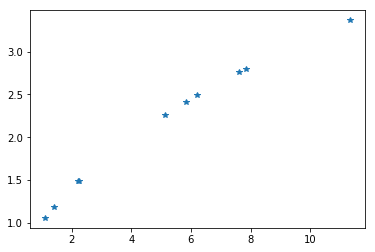

In [18]:
plt.plot(x_values, y_values, '*')

In [19]:
n = np.random.rand()
n = tf.Variable(n)
x_plh = tf.placeholder(tf.float32)

In [20]:
ans = tf.multiply(tf.sqrt(x_plh), n) 
init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [21]:
with tf.Session() as sess:
    sess.run(init)
    sess.run(ans, feed_dict={x_plh: x_values})
    saver.save(sess, 'models/calc_graph.ckpt')

In [22]:
 x_test = np.linspace(-1, 11, 10) + np.random.uniform(-1.5, 1.5, 10)

In [23]:
with tf.Session() as sess2:
    saver.restore(sess2, 'models/calc_graph.ckpt')
    ans_tf = sess2.run([ans], feed_dict = {x_plh:x_test})

INFO:tensorflow:Restoring parameters from models/sqrt_model.ckpt


In [24]:
x_test[0], ans_tf[0]

(0.15873225593999774,
 array([0.12594584, 0.32379234, 0.39898178, 0.5298464 , 0.66308916,
        0.8057852 , 0.846873  , 0.9751506 , 0.9277753 , 1.0064162 ],
       dtype=float32))

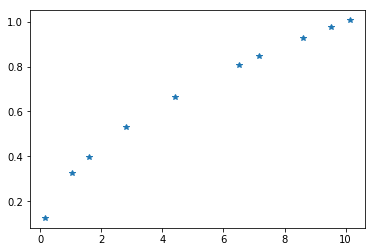

In [25]:
plt.plot(x_test, ans_tf[0], '*')